In [25]:
import pandas as pd
import lime

import sklearn
import sklearn.ensemble
import sklearn.metrics

In [26]:
df = pd.read_csv('../data/migraine.csv')
pd.set_option('display.float_format', '{:0.2f}'.format)

In [27]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, :-1]
y = df['Type']

#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [28]:
from sklearn.naive_bayes import CategoricalNB

gnb = CategoricalNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [29]:
from sklearn.metrics import classification_report

y_pred = gnb.predict(X_test)

print(classification_report(y_true = y_test, y_pred = y_pred))

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.62      0.77         8
 Familial hemiplegic migraine       0.60      0.60      0.60         5
        Migraine without aura       0.91      0.91      0.91        11
                        Other       1.00      1.00      1.00         4
 Sporadic hemiplegic migraine       1.00      0.20      0.33         5
   Typical aura with migraine       0.88      0.98      0.93        62
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.89       100
                    macro avg       0.91      0.76      0.79       100
                 weighted avg       0.90      0.89      0.88       100



In [30]:

class_labels = gnb.classes_
class_probabilities = dict(zip(class_labels, gnb.predict_proba(X_test)[0]))
print(class_probabilities)

{'Basilar-type aura': 0.8878884636940544, 'Familial hemiplegic migraine': 0.086028386551334, 'Migraine without aura': 5.710083762708755e-05, 'Other': 0.008497252119480917, 'Sporadic hemiplegic migraine': 0.001305319051303602, 'Typical aura with migraine': 0.015614364950680094, 'Typical aura without migraine': 0.0006091127955203756}


In [31]:


#from lime.lime_text import LimeTextExplainer
#explainer = LimeTextExplainer(class_names=class_labels)



In [32]:
from lime.lime_tabular import LimeTabularExplainer

# Stwórz explainer z danych treningowych (potrzebuje surowych, nieprzeskalowanych danych)
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # nieprzeskalowane dane treningowe, jeśli dostępne
    feature_names=df.columns[:-1].tolist(),  # nazwy cech
    class_names=class_labels,  # nazwy klas
    mode='classification'  # dla zadania klasyfikacji
)

In [33]:
print(class_probabilities.keys())

dict_keys(['Basilar-type aura', 'Familial hemiplegic migraine', 'Migraine without aura', 'Other', 'Sporadic hemiplegic migraine', 'Typical aura with migraine', 'Typical aura without migraine'])


In [34]:
print(class_labels)

['Basilar-type aura' 'Familial hemiplegic migraine'
 'Migraine without aura' 'Other' 'Sporadic hemiplegic migraine'
 'Typical aura with migraine' 'Typical aura without migraine']


[('Character <= 1.00', -0.00549989354087715), ('Paresthesia > 0.00', 0.00517573483770782), ('Location <= 1.00', -0.0031350428450751325), ('Duration > 2.00', 0.0017932571156005943), ('2.00 < Intensity <= 3.00', 0.0012122679408811431), ('Age <= 22.00', 0.0006106493466030788), ('Visual > 2.00', -0.0004647501012096274), ('Vertigo > 0.00', 0.00033897890525209207), ('Hypoacusis <= 0.00', 0.0003146866022203135), ('Sensory > 0.00', -0.0002855704726126303), ('Frequency <= 1.00', -0.00027113661222110514), ('Dysarthria <= 0.00', -0.00018214977346989753), ('Conscience <= 0.00', -0.00018074116499989094), ('Vomit <= 0.00', 0.00010087521038352532), ('Tinnitus <= 0.00', -7.522922193112436e-05), ('Visual_defect <= 0.00', 4.7154258164699704e-05), ('Dysphasia <= 0.00', -3.767627440234795e-05), ('Diplopia <= 0.00', 1.363046863875216e-05), ('0.00 < DPF <= 1.00', -8.099259964918956e-06), ('Nausea <= 1.00', 0.0), ('Phonophobia <= 1.00', 0.0), ('Photophobia <= 1.00', 0.0), ('Ataxia <= 0.00', 0.0)]


/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

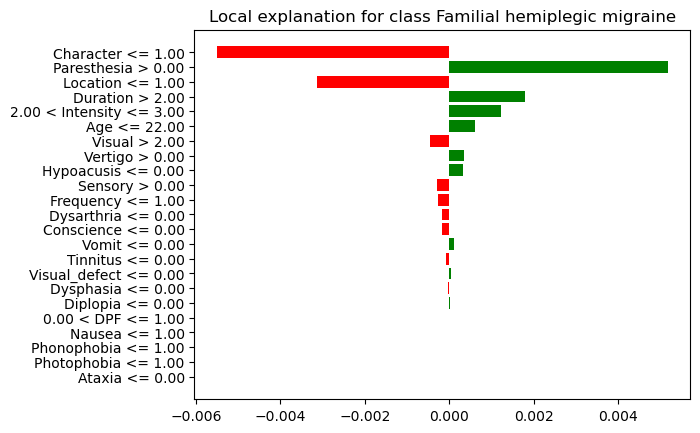

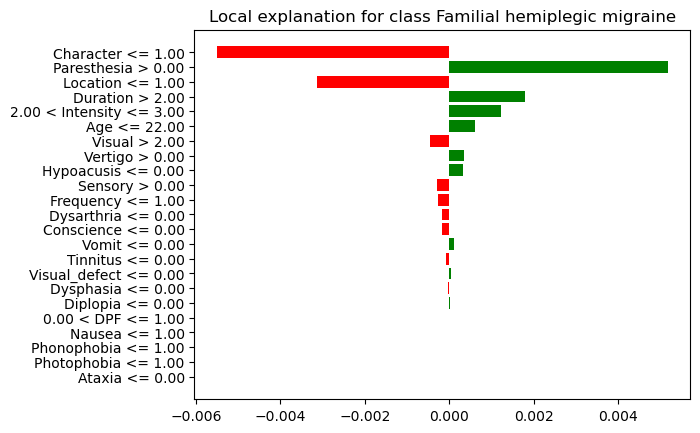

In [35]:
instance_index = 0  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba, # funkcja predykcyjna modelu
    num_features=23
)

# Wyświetl wyniki
print(exp.as_list())
exp.as_pyplot_figure()

In [36]:
exp.show_in_notebook()

/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

[('Character <= 1.00', -0.004395195015182047), ('Location <= 1.00', -0.0034431031121163504), ('Intensity <= 2.00', -0.0011897047073490441), ('2.00 < Frequency <= 4.00', 0.00108677358381521), ('Paresthesia <= 0.00', -0.0009703102823475063), ('1.00 < Visual <= 2.00', 0.0008228506451031648), ('Duration <= 1.00', -0.000683061662984899), ('Age > 40.00', -0.0005645504303232371), ('Sensory <= 0.00', 0.00030444621648482333), ('Diplopia <= 0.00', 0.00027928559733777093)]


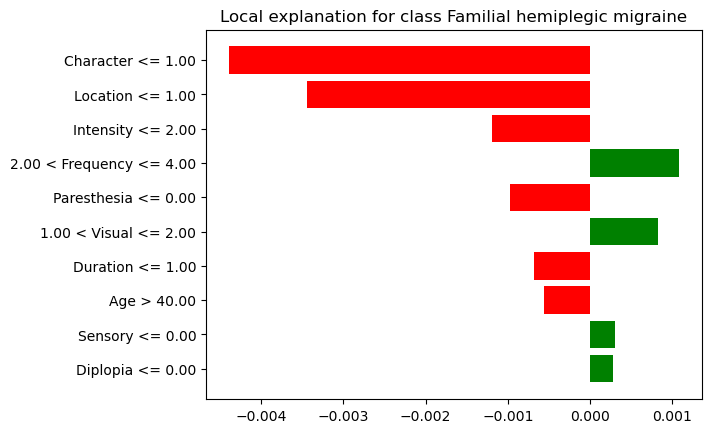

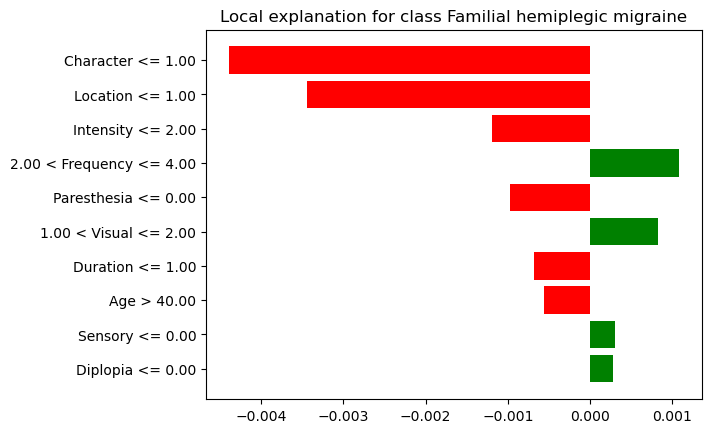

In [37]:
instance_index = 1  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba  # funkcja predykcyjna modelu
)

# Wyświetl wyniki
print(exp.as_list())
exp.as_pyplot_figure()

In [38]:
exp.show_in_notebook()

/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

[('Character <= 1.00', -0.005253039807050776), ('Location <= 1.00', -0.0029779913208867973), ('2.00 < Intensity <= 3.00', 0.001179596223816698), ('Duration <= 1.00', -0.0006649158219913499), ('Visual <= 1.00', -0.0005119459608515615), ('29.00 < Age <= 40.00', -0.0005072732199947491), ('Visual_defect <= 0.00', -0.00045443023369768547), ('Conscience <= 0.00', 0.0003855835961680639), ('Sensory > 0.00', -0.0002941582818454145), ('Dysarthria <= 0.00', 0.0002490121020848366), ('Vertigo <= 0.00', 0.0001972167820422246), ('Hypoacusis <= 0.00', 0.00017530722345277688), ('Tinnitus <= 0.00', 7.930149454164707e-05), ('Dysphasia <= 0.00', -6.65188134391325e-05), ('1.00 < Frequency <= 2.00', -5.5076215234820485e-05), ('DPF <= 0.00', -5.43317729487608e-05), ('Vomit <= 0.00', -4.53755926399621e-05), ('Paresthesia <= 0.00', -3.4958465956441374e-06), ('Diplopia <= 0.00', -1.008238754981495e-06), ('Nausea <= 1.00', 0.0), ('Phonophobia <= 1.00', 0.0), ('Photophobia <= 1.00', 0.0), ('Ataxia <= 0.00', 0.0)]

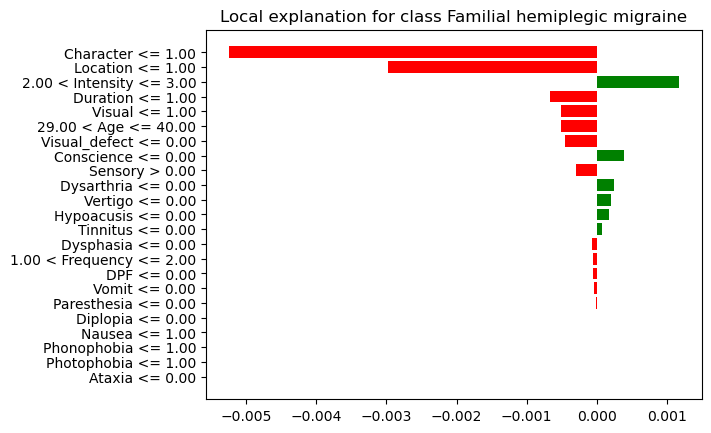

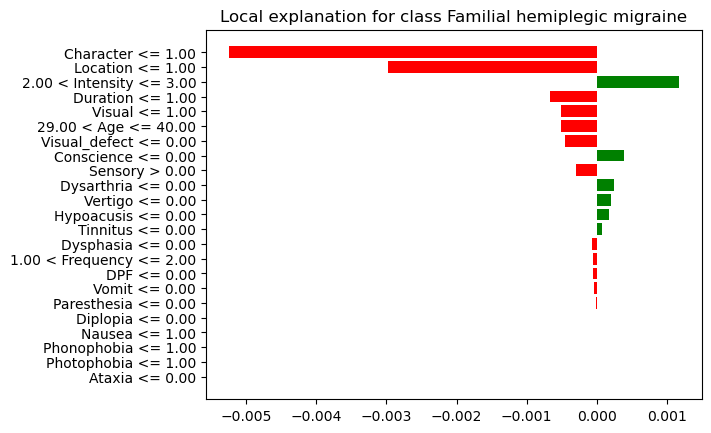

In [39]:
instance_index = 49  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba,  # funkcja predykcyjna modelu
    num_features=23
)

# Wyświetl wyniki
print(exp.as_list())
exp.as_pyplot_figure()

In [40]:
exp.show_in_notebook(show_predicted_value=True)

/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

[('Character <= 1.00', -0.00502388961894567), ('Location <= 1.00', -0.0040199309567849565), ('Intensity <= 2.00', -0.0012033309037865994), ('Visual > 2.00', -0.0007937980467054173), ('Duration <= 1.00', -0.0007056565781832536), ('Age > 40.00', -0.0005319029067954883), ('Paresthesia <= 0.00', 0.00042348082153852867), ('Conscience <= 0.00', -0.00024417021418889344), ('Sensory > 0.00', -0.00024127816266154042), ('Dysphasia <= 0.00', -0.00022412177327187527)]


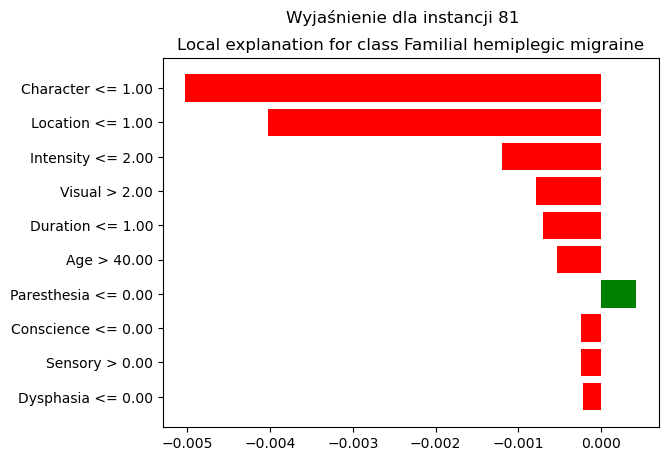

In [41]:
instance_index = 80  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba  # funkcja predykcyjna modelu
)

# Wyświetl wyniki
print(exp.as_list())
plt = fig = exp.as_pyplot_figure()
fig.suptitle(f'Wyjaśnienie dla instancji {instance_index+1}')
plt.show()

In [42]:
exp.show_in_notebook()

[('Character > 1.00', 0.0049669291907600945), ('Location > 1.00', 0.004316080622473149), ('Duration > 2.00', 0.0015089193793269193), ('2.00 < Intensity <= 3.00', 0.0011902625544452118), ('Conscience <= 0.00', -0.0008984454616532065), ('Age > 40.00', -0.000589597474577248), ('Paresthesia <= 0.00', 0.0005203437215001366), ('Dysarthria <= 0.00', -0.0005166460007188675), ('Visual <= 1.00', -0.0005009617804783754), ('Hypoacusis <= 0.00', -0.00036199459975187054)]


/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/kp/anaconda3/envs/visualization/lib/python3.9/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

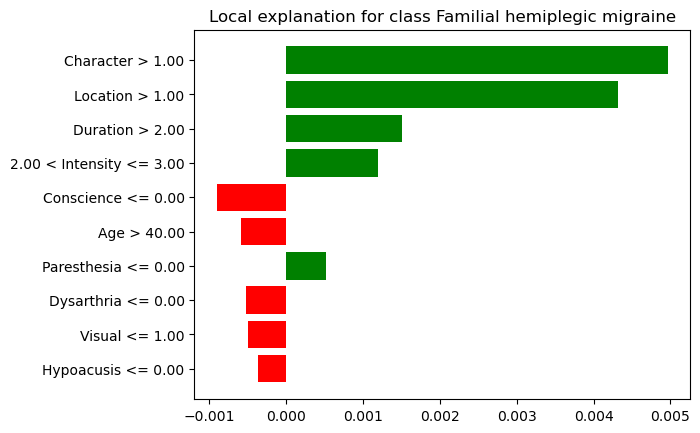

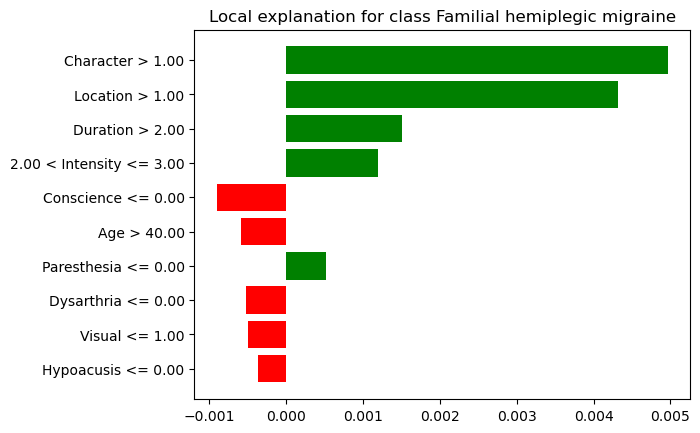

In [43]:
instance_index = 22  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba  # funkcja predykcyjna modelu
)

# Wyświetl wyniki
print(exp.as_list())
exp.as_pyplot_figure()

In [44]:
exp.show_in_notebook()

In [45]:
#print("Przewidywane klasy dla instancji:", gnb.predict(X_test[instance_index].reshape(1, -1)))


In [46]:
print(exp.top_labels)

None


In [47]:
probs = gnb.predict_proba(X_test)
class_labels = gnb.classes_
class_probabilities = []
for i in range(len(probs)):
    class_probabilities.append(dict(zip(class_labels, probs[i])))


In [48]:


for i in range(len(class_probabilities)):
    print(i, ":", y_pred[i])
    for klucz, wartosc in class_probabilities[i].items():
        print(f"{wartosc}: \t{klucz}")
    print(" ")

0 : Basilar-type aura
0.8878884636940544: 	Basilar-type aura
0.086028386551334: 	Familial hemiplegic migraine
5.710083762708755e-05: 	Migraine without aura
0.008497252119480917: 	Other
0.001305319051303602: 	Sporadic hemiplegic migraine
0.015614364950680094: 	Typical aura with migraine
0.0006091127955203756: 	Typical aura without migraine
 
1 : Typical aura with migraine
1.0844095236328973e-05: 	Basilar-type aura
0.000256084776523683: 	Familial hemiplegic migraine
3.7382299169130226e-05: 	Migraine without aura
9.709132259503369e-06: 	Other
0.00033471224636999475: 	Sporadic hemiplegic migraine
0.9993511622721301: 	Typical aura with migraine
1.0517831160873041e-07: 	Typical aura without migraine
 
2 : Typical aura with migraine
0.144870509653324: 	Basilar-type aura
0.3368795081082902: 	Familial hemiplegic migraine
0.024456446885692984: 	Migraine without aura
0.008734551874349891: 	Other
0.0003194695797191486: 	Sporadic hemiplegic migraine
0.4840239444435996: 	Typical aura with migraine
0